In [1]:
import torch
import joblib
import pickle
import pandas as pd
import numpy as np
from functions import auroc_curve, evaluation, rm, complete_confusion_matrix_robust, evaluation_robustness, complete_confusion_matrix
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])
model_results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [4]:
X_test_101 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_101.csv"))
y_test_101 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_101.csv"))

X_test_102 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_102.csv"))
y_test_102 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_102.csv"))

X_test_103 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_103.csv"))
y_test_103 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_103.csv"))

X_test_104 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_104.csv"))
y_test_104 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_104.csv"))

X_test_105 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_105.csv"))
y_test_105 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_105.csv"))

X_tests = [X_test_101, X_test_102, X_test_103, X_test_104, X_test_105]
y_tests = [y_test_101, y_test_102, y_test_103, y_test_104, y_test_105]

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression tuned ROS model

In [5]:
logreg_tuned_ros = joblib.load(path_model + "logreg_tuned_ROS.joblib")
cm_robust_logreg = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = logreg_tuned_ros.predict(X_t)
    y_pred_prob = logreg_tuned_ros.predict_proba(X_t)[:, 1]
    cm_robust_logreg += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, logreg_tuned_ros, y_pred, y_pred_prob, model_results)

cm_robust_logreg //= 5

In [ ]:
logreg_tuned_ros = joblib.load(path_model + "logreg_tuned_ROS.joblib")
y_pred_logreg_tuned_ros = logreg_tuned_ros.predict(X_test_101)
y_pred_prob_logreg_tuned_ros = logreg_tuned_ros.predict_proba(X_test_101)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AUROC Score:  0.74
Balanced Accuracy Score:  0.683
F1 Score:  0.481
Recall Score:  0.499
Precision Score:  0.465


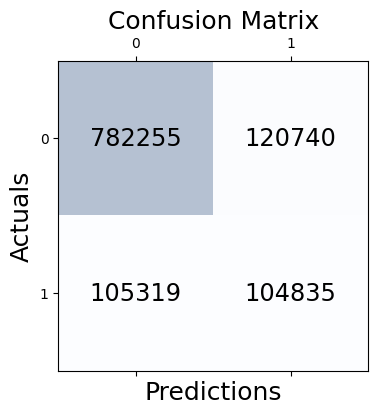

In [ ]:
evaluation(y_test_101, y_pred_logreg_tuned_ros, logreg_tuned_ros, y_pred_prob_logreg_tuned_ros, results)

## Evaluate XGBoost tuned ROS model

In [6]:
xgb_class_tuned_ros = joblib.load(path_model + "XGBoost_tuned_ROS.joblib")
cm_robust_xgb = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = xgb_class_tuned_ros.predict(X_t)
    y_pred_prob = xgb_class_tuned_ros.predict_proba(X_t)[:, 1]
    cm_robust_xgb += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, xgb_class_tuned_ros, y_pred, y_pred_prob, model_results)

cm_robust_xgb //= 5

In [ ]:
xgb_class_tuned_ros = joblib.load(path_model + "XGBoost_tuned_ROS.joblib")
y_pred_xgb_tuned_ros = xgb_class_tuned_ros.predict(X_test_101)
y_pred_prob_xgb_tuned_ros = xgb_class_tuned_ros.predict_proba(X_test_101)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [19:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:385: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [19:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


AUROC Score:  0.819
Balanced Accuracy Score:  0.746
F1 Score:  0.563
Recall Score:  0.64
Precision Score:  0.503


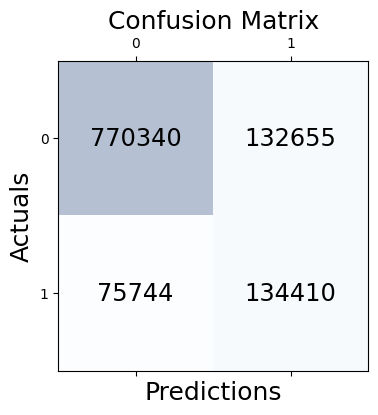

In [ ]:
evaluation(y_test_101, y_pred_xgb_tuned_ros, xgb_class_tuned_ros, y_pred_prob_xgb_tuned_ros, results)

## Evaluate TabNet tuned ROS model

In [8]:
tabnet_tuned_ros = torch.load(path_model + "TabNet_tuned_ROS.pt", map_location=torch.device('cpu'))
tabnet_tuned_ros.device = "cpu"
cm_robust_tabnet = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = tabnet_tuned_ros.predict(X_t.values)
    y_pred_prob = tabnet_tuned_ros.predict_proba(X_t.values)[:, 1]
    cm_robust_tabnet += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, tabnet_tuned_ros, y_pred, y_pred_prob, model_results)

cm_robust_tabnet //= 5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.2 MB/s eta 0:00:00


In [ ]:
tabnet_tuned_ros = torch.load(path_model + "TabNet_tuned_ROS.pt", map_location=torch.device('cpu'))
tabnet_tuned_ros.device = "cpu"
y_pred_tabnet_tuned_ros = tabnet_tuned_ros.predict(X_test_101.values)
y_pred_prob_tabnet_tuned_ros = tabnet_tuned_ros.predict_proba(X_test_101.values)[:, 1]

AUROC Score:  0.768
Balanced Accuracy Score:  0.704
F1 Score:  0.496
Recall Score:  0.593
Precision Score:  0.426


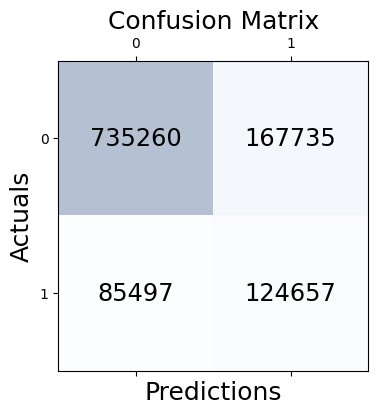

In [ ]:
evaluation(y_test_101, y_pred_tabnet_tuned_ros, tabnet_tuned_ros, y_pred_prob_tabnet_tuned_ros, results)

## Evaluate Random Forests tuned ROS model

In [9]:
rf_tuned_ros = joblib.load(path_model + "rf_tuned_ROS.joblib")
cm_robust_rf = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = rf_tuned_ros.predict(X_t.values)
    y_pred_prob = rf_tuned_ros.predict_proba(X_t.values)[:, 1]
    cm_robust_rf += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, rf_tuned_ros, y_pred, y_pred_prob, model_results)

cm_robust_rf //= 5

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.4s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   23.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.4s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   23.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   22.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      |

In [ ]:
rf_tuned_ros = joblib.load(path_model + "rf_tuned_ROS.joblib")
y_pred_rf_tuned_ros = rf_tuned_ros.predict(X_test_101)
y_pred_prob_rf_tuned_ros = rf_tuned_ros.predict_proba(X_test_101)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[Parallel(n_jobs=8)]: Using ba

AUROC Score:  0.798
Balanced Accuracy Score:  0.726
F1 Score:  0.543
Recall Score:  0.584
Precision Score:  0.507


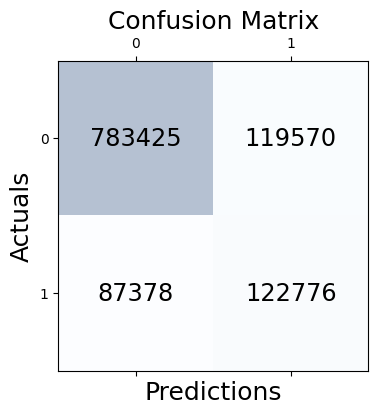

In [ ]:
evaluation(y_test_101, y_pred_rf_tuned_ros, rf_tuned_ros, y_pred_prob_rf_tuned_ros, results)

## Final results per model

In [ ]:
results.sort_values(by=["AUROC"], ascending=False)

,Model,AUROC,Balanced Accuracy,F1,Recall,Precision
3,XGBClassifier,0.819,0.746,0.563,0.640,0.503
1,RandomForestClassifier,0.798,0.726,0.543,0.584,0.507
2,TabNetClassifier,0.768,0.704,0.496,0.593,0.426
4,LogisticRegression,0.740,0.683,0.481,0.499,0.465


In [10]:
final_result = model_results.groupby('Model').agg({
    'AUROC': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Accuracy': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'F1': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Recall': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Precision': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))]
})

final_result.columns = ['_'.join(col).strip() for col in final_result.columns.values]

final_result.sort_values(by=["AUROC_mean"], ascending=False)

,AUROC_mean,AUROC_range,Accuracy_mean,Accuracy_range,F1_mean,F1_range,Recall_mean,Recall_range,Precision_mean,Precision_range
Model,,,,,,,,,,
XGBClassifier,0.8672,0.061,0.8340,0.027,0.6146,0.065,0.7020,0.078,0.5468,0.055
RandomForestClassifier,0.8396,0.052,0.8300,0.020,0.5840,0.052,0.6316,0.061,0.5430,0.045
TabNetClassifier,0.7690,0.002,0.7734,0.001,0.4970,0.002,0.5936,0.003,0.4272,0.002
LogisticRegression,0.7404,0.001,0.7976,0.001,0.4822,0.002,0.4996,0.003,0.4660,0.002


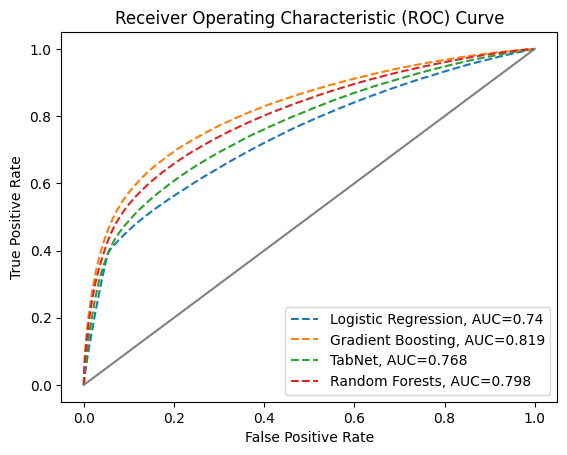

<Figure size 1400x1200 with 0 Axes>

In [ ]:
auroc_curve(y_test, y_pred_prob_logreg_tuned_ros, y_pred_prob_xgb_tuned_ros, y_pred_prob_tabnet_tuned_ros, y_pred_prob_rf_tuned_ros)

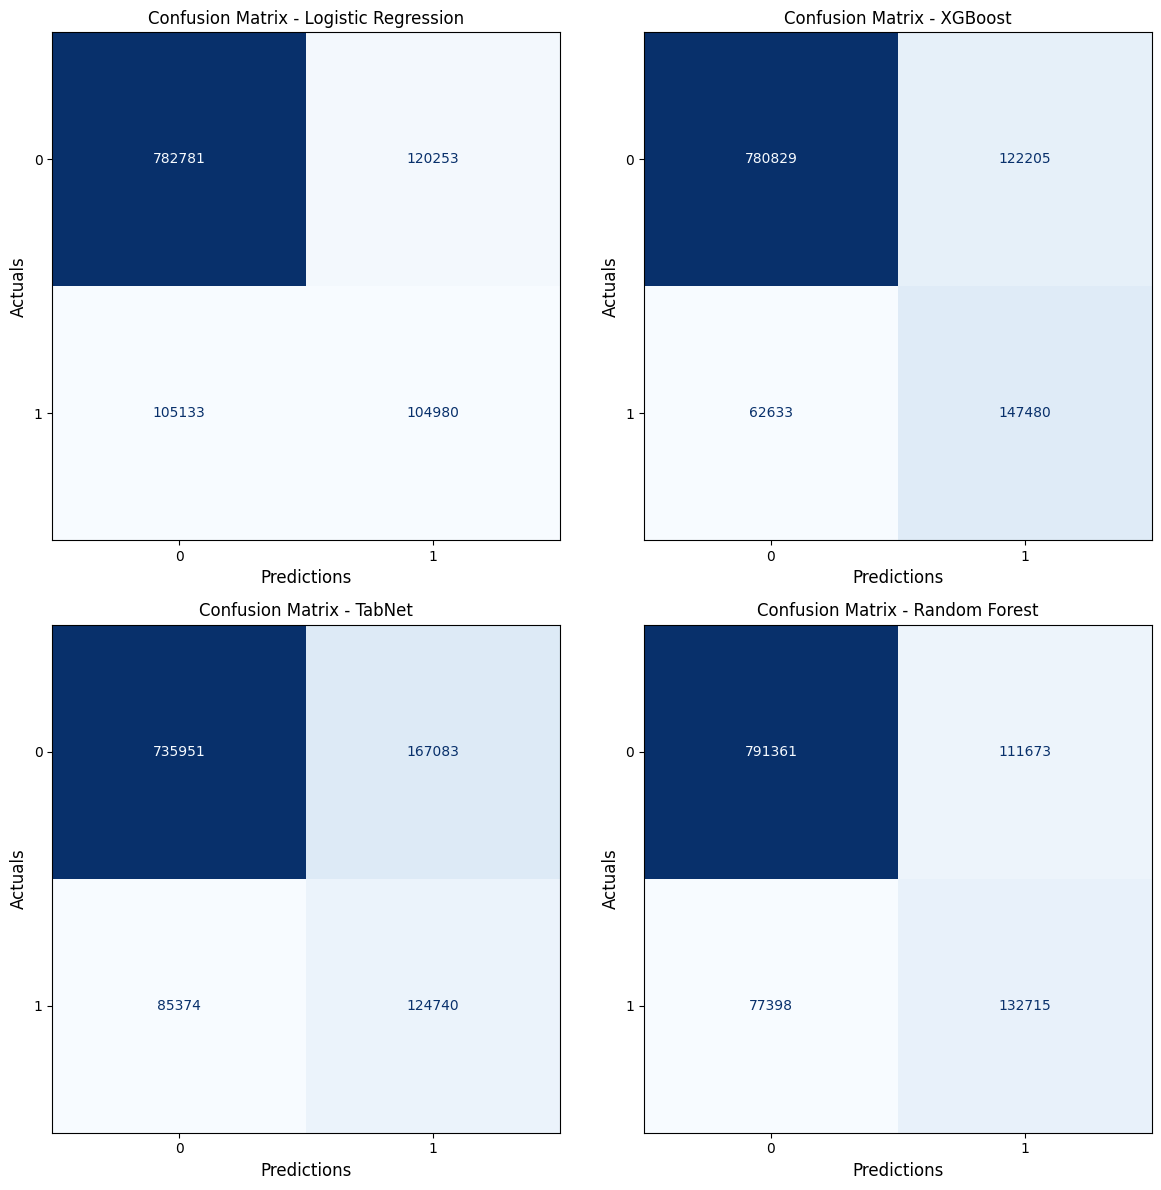

In [11]:
complete_confusion_matrix_robust([cm_robust_logreg, cm_robust_xgb, cm_robust_tabnet, cm_robust_rf], ['Logistic Regression', 'XGBoost', 'TabNet', 'Random Forest'])